<h1 align="center">WORKOUT ACTIVITY PREDICTIVE MODELS</h1>
<h3 align="center">Regression, Classification and Clustering</h3>
<br>
<br>
<center>Practical Assignment</center>
<center>A240A0050 Big Data in Business and Industry</center>
<center>Autumn 2022</center>
<center>Authors: Thanh Tran (000285359), Nghia Nguyen (000275466)</center>

A dataset containing tracking **workout details** belonging to one person for the period from 2017 to 2020 with **3456 events** recorded with a sport tracking software named Endomondo has been offered for this project.

The modelling goal is to construct a **predictive model** which is capable to suggest the exercise type, time and duration of the next workout event.

In order to accomplish the modelling goal, **three alternatives** have been implemented and compared in terms of  performance, optimization, computation efficiency, degree of complexity, time efficiency... One alternative will be concluded as our **final model**.

## Modelling Plan

This project aims at generating **ONE FINAL PREDICTIVE MODEL** to predict the **exercise type, time** and **duration** of the person's **next workout event**.

- Alternative 1: Using all variables without NaN (9 original variables) with **No movement patterns** considered => KNN classifier, Linear Regressor
- Alternative 2: Using all variables with filled values and **2D (latitude, longtitude) movement patterns** => KNN classifier, Linear Regressor
- Alternative 3: Using all variables with filled values and **3D (latitude, longtitude, altitude) movement patterns** => KNN classifier, Linear Regressor
- Decision on the most optimal model => **FINAL MODEL**

## Source code

* The repository to the project is made public and can be accessed from [HERE](https://github.com/Thanhtrannd/WorkoutBigDataPredictiveModel.git)  


## Procedure

* Data Exploration (JSON Data Loading, Checking & Filling NaN values)
* Data Pretreatment (One-hot encoding, Data Normalization)
* Feature Engineering (Data Mining, timeseries shifting, Data Transformation)
* Model Construction (KNN Classifier, Linear Regressor)
* Final Model Selection

##  Introduction

Clustering methods partition a dataset consisting of $m$ data points $\mathbf{x}^{(i)} \in \mathbb{R}^{n}$, into a small number of groups or "clusters" $\mathcal{C}_{1},\ldots,\mathcal{C}_{k}$. Each cluster $\mathcal{C}_{l}$ represents a subset of data points which are more similar to each other than to data points in another cluster. The precise meaning of two data points being "similar" depends on the application at hand. 

Clustering methods do not require labeled data and can be applied to data points characterized solely by its features $\mathbf{x}^{(i)}$. Therefore, clustering methods are an example of **unsupervised machine learning methods**. However, clustering methods are also used in combination (e.g., as a preprocessing step) with supervised learning methods such as regression or classification. 

Clustering methods are roughly divided into two groups:

* Hard clustering methods that assign each data point to exactly one cluster and 
* Soft clustering methods that assign each data point to several different clusters with varying degrees of belonging.

Hard clustering can be interpreted as a special case of soft-clustering where the degrees of belonging are enforced to be either 0 (not belonging) or 1 (belongs). 

This notebook will consider one popular method for hard clustering, the k-means algorithm, and one popular method for soft clustering based on a probabilistic Gaussian mixture model (GMM). These two methods use a notion of similarity that is tied to the Euclidean geometry of $\mathbb{R}^{n}$. 

The notebook also presents the DBSCAN algorithm, which is a hard clustering method that uses a non-Euclidean notion of similarity to cluster the data points. 

## The Data

Our data has been offered in form of a separate JSON file for each workout event. The tracking data comes from 2 sources which are auto-tracking and manual input. That causes inconsistency in the raw data with a plethora of NaN values for several features.

Therefore, the data after loading has yet been ready for model construction, so several steps of exploration and pretreatment need to be carried out.

## Data Exploration

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 1:</b> Loading the Data. 
 
The following code loads and transforms the dataset into a neat pandas dataframe which is saved into a csv file named `"df_res.csv"`, in which each row represents a data point and each column a feature.
The loading step can be commented out to save computational power and time consumption for reloading 3456 JSON files.
</div>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib as plt

# Load JSON data files

# Read in data from the csv file and store it in the data matrix df_rex.
df_res = pd.read_csv("./data/df_res.csv")

# Display first 5 rows
print("First five datapoints:")
display(df_res.head(5))

NameError: name 'df_res' is not defined

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 2:</b> Plotting the Data (Duration against Time of each exercise type)

The data is plotted in a scatter plot using the custom helper function `plotting` for plotting a scatter plot of a dataset with or without clusters.
</div>

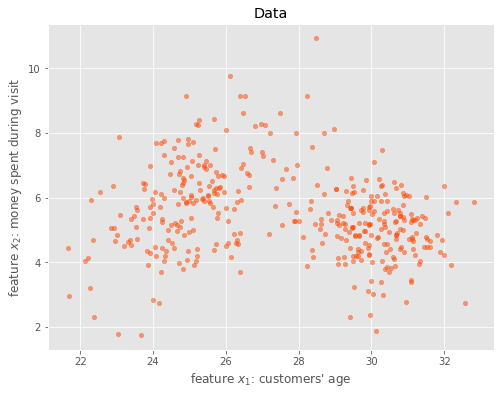

In [4]:
def plotting(data, centroids=None, clusters=None, title='Data', show=True):
    # This function will later on be used for plotting the clusters and centroids. But now we use it to just make a scatter plot of the data
    # Input: the data as an array, cluster means (centroids), cluster assignemnts in {0,1,...,k-1}   
    # Output: a scatter plot of the data in the clusters with cluster means
    plt.figure(figsize=(8,6))
    data_colors = ['orangered', 'dodgerblue', 'springgreen']
    centroid_colors = ['red', 'darkblue', 'limegreen'] # Colors for the centroids
    plt.style.use('ggplot')
    plt.title(title)
    plt.xlabel("feature $x_1$: customers' age")
    plt.ylabel("feature $x_2$: money spent during visit")

    alp = 0.5             # data points alpha
    dt_sz = 20            # marker size for data points 
    cent_sz = 130         # centroid sz 
    
    if centroids is None and clusters is None:
        plt.scatter(data[:,0], data[:,1], s=dt_sz, alpha=alp, c=data_colors[0])
    if centroids is not None and clusters is None:
        plt.scatter(data[:,0], data[:,1], s=dt_sz, alpha=alp, c=data_colors[0])
        plt.scatter(centroids[:,0], centroids[:,1], marker="x", s=cent_sz, c=centroid_colors[:len(centroids)])
    if centroids is not None and clusters is not None:
        plt.scatter(data[:,0], data[:,1], c=[data_colors[i] for i in clusters], s=dt_sz, alpha=alp)
        plt.scatter(centroids[:,0], centroids[:,1], marker="x", c=centroid_colors[:len(centroids)], s=cent_sz)
    if centroids is None and clusters is not None:
        plt.scatter(data[:,0], data[:,1], c=[data_colors[i] for i in clusters], s=dt_sz, alpha=alp)
    
    if show:
        plt.show()

# Extract Cluster indices

# Compute centroids of clusters (sport types)

# Plot the (unclustered) data
plotting(X)   

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 3:</b> Checking and Filling NaN. 
 
The code snippet below checks the number of NaN values of each feature and firstly fills NaN accordingly to prepare datasets for each alternative model. The resulting dataset is saved into a csv file named `"df_res_filled.csv"`, in which each row represents a data point and each column a feature.
</div>

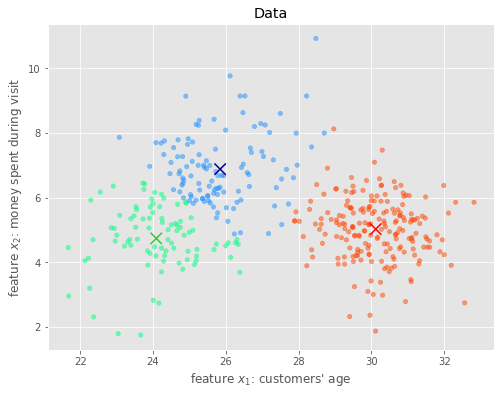

In [5]:
# Count NaN values of each feature

# Fill the only 1 existing NaN of feature "calories" with the average burn rate of particular exercise type

# Fill location data (Latitude, Longtitude)

# 

## Data Pretreatment

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 1:</b> 
INFO HERE
</div>